Упражнение 3.1

В данном упражнении исследуется эффект спектрального растекания и методы его подавления с использованием оконных функций. Первоначально генерируется гармонический сигнал, и отображается его временная форма и спектр при условии, что длительность сигнала кратна его периоду. Затем длительность сигнала изменяется таким образом, чтобы она не была кратна периоду, что приводит к появлению боковых лепестков в спектре. Для уменьшения этого эффекта применяется окно Кайзера к сигналу, после чего снова строится спектр. Анализируется влияние параметра `beta` окна Кайзера на степень сглаживания и ширину главного лепестка спектральной характеристики.

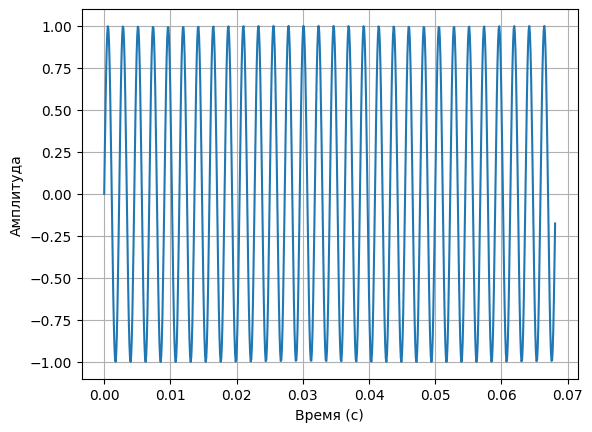

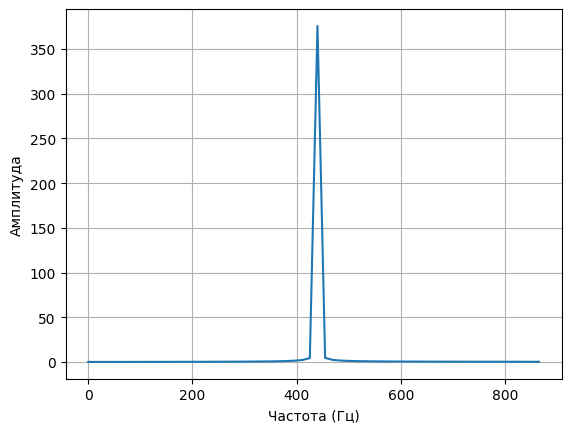

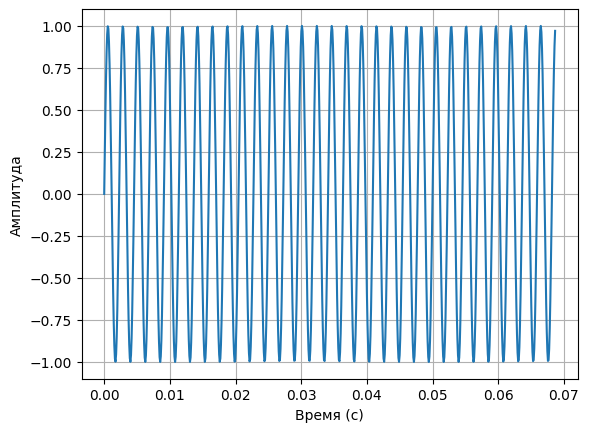

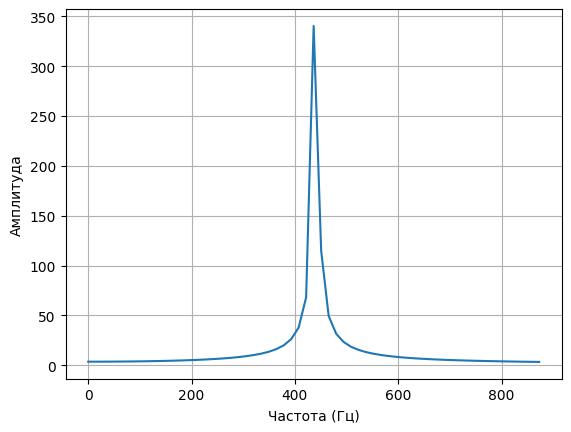

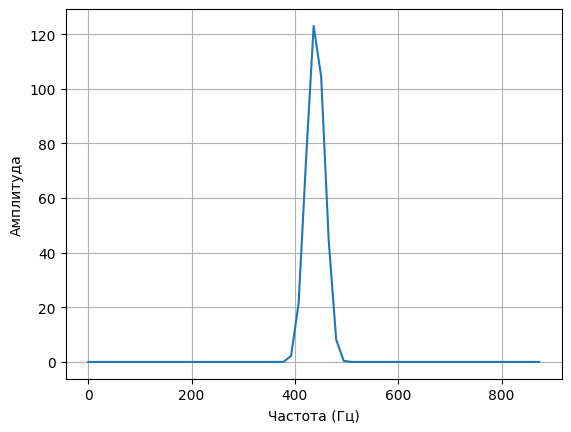

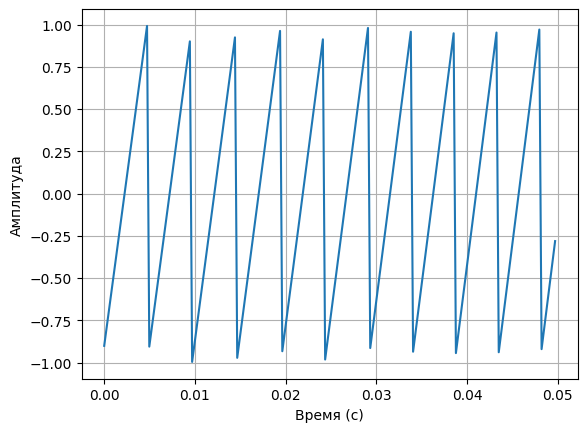

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from thinkdsp import SinSignal, Chirp, read_wave, PI2, normalize, unbias

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

harmonic_signal = SinSignal(freq=440)
time_span = harmonic_signal.period * 30
audio_wave = harmonic_signal.make_wave(time_span)
audio_wave.plot()
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

freq_content = audio_wave.make_spectrum()
freq_content.plot(high=880)
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

time_span = harmonic_signal.period * 30.25
audio_wave = harmonic_signal.make_wave(time_span)
audio_wave.plot()
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

freq_content = audio_wave.make_spectrum()
freq_content.plot(high=880)
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

audio_wave.ys = audio_wave.ys * np.kaiser(len(audio_wave.ys), beta=14)
freq_content = audio_wave.make_spectrum()
freq_content.plot(high=880)
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

class SawtoothChirp(Chirp):
    def evaluate(self, ts):
        freqs = np.linspace(self.start, self.end, len(ts) - 1)
        dts = np.diff(ts)
        dphis = PI2 * freqs * dts
        phases = np.cumsum(dphis)
        cycles = phases / PI2
        frac, _ = np.modf(cycles)
        ys = normalize(unbias(frac), self.amp)
        return ys

chirp_signal = SawtoothChirp(start=200, end=500)
chirp_wave = chirp_signal.make_wave(duration=1, framerate=4025)
chirp_wave.segment(start=0, duration=0.05).plot()
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

chirp_wave.apodize()
chirp_wave.make_audio()

Упражнение 3.2

Целью этого упражнения является создание и анализ пилообразного чирп-сигнала. Для этого определяется класс `SawtoothChirp`, унаследованный от `Chirp`, который переопределяет метод `evaluate` для генерации пилообразной формы волны с линейно изменяющейся частотой. Создается экземпляр этого чирпа, изменяющего частоту от 200 Гц до 500 Гц. Визуализируется начальный фрагмент этого сигнала для демонстрации его пилообразной структуры и изменения периода. К сигналу применяется аподизация для сглаживания краев.

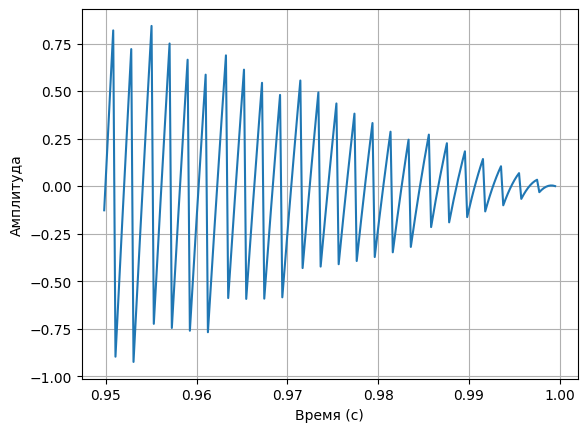

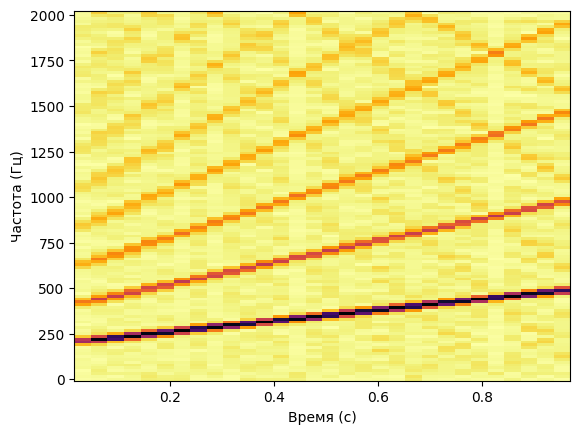

In [2]:
chirp_wave.segment(start=1-0.05, duration=0.05).plot()
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

chirp_spectrogram = chirp_wave.make_spectrogram(256)
chirp_spectrogram.plot()
plt.xlabel('Время (с)')
plt.ylabel('Частота (Гц)')
plt.show()



Упражнение 3.3

В данном разделе продолжается работа с классом `SawtoothChirp`. Генерируется новый пилообразный чирп-сигнал, но уже с другими параметрами: начальная частота 2500 Гц, конечная частота 3000 Гц, длительность 1 секунда и частота дискретизации 20000 Гц. Визуализируется фрагмент сигнала ближе к его концу, чтобы наглядно показать более высокую частоту. Затем строится и отображается полный спектр этого чирп-сигнала, демонстрирующий распределение энергии по частотам в указанном диапазоне.

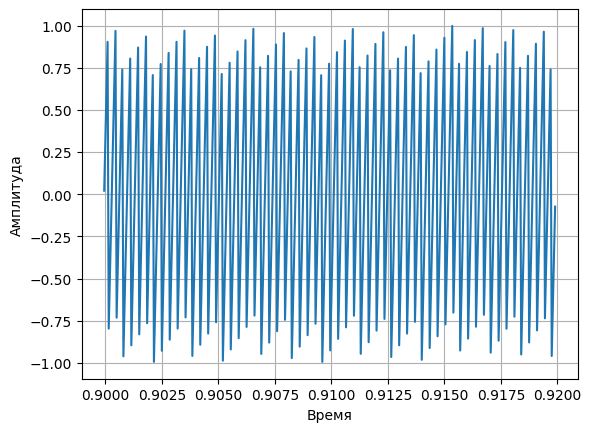

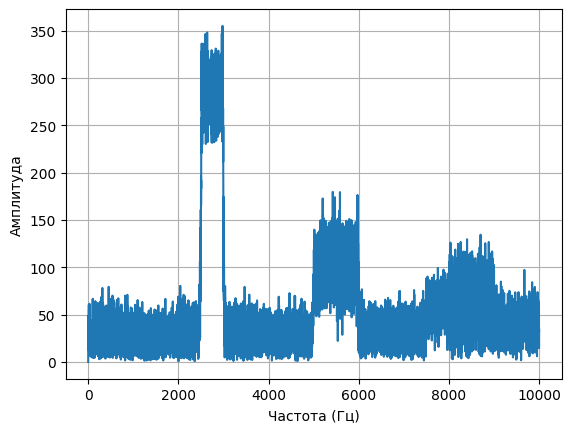

In [3]:
chirp_signal = SawtoothChirp(start=2500, end=3000)
chirp_wave = chirp_signal.make_wave(duration=1, framerate=20000)
chirp_wave.segment(start=0.9, duration=0.02).plot()
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

chirp_wave.make_audio()

freq_content = chirp_wave.make_spectrum()
freq_content.plot()
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()



Упражнение 3.4

Это упражнение посвящено анализу реального звукового сигнала — глиссандо кларнета из произведения "Rhapsody in Blue". Загружается аудиофайл `3.1.wav`. Из полного сигнала извлекается и визуализируется сегмент, содержащий интересующее глиссандо. Далее строится спектр этого сегмента для изучения его частотного состава. Для более детального анализа изменения частоты во времени создается и отображается спектрограмма всего аудиофайла. В завершение, вводится новый класс `TromboneGliss`, предназначенный для моделирования глиссандо, где частота изменяется таким образом, что длина волны изменяется линейно, что характерно для тромбона.

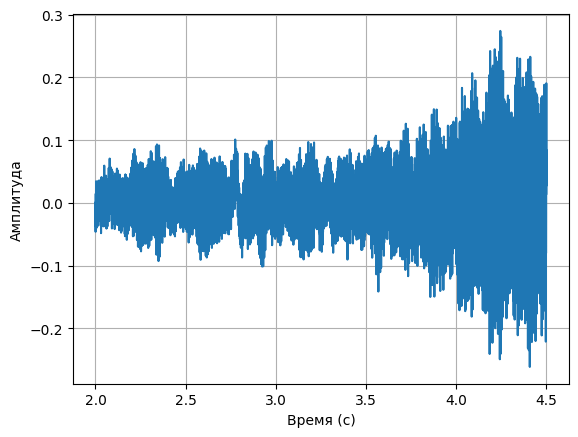

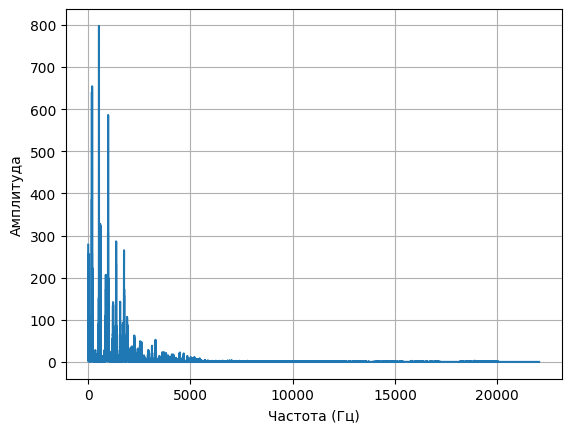

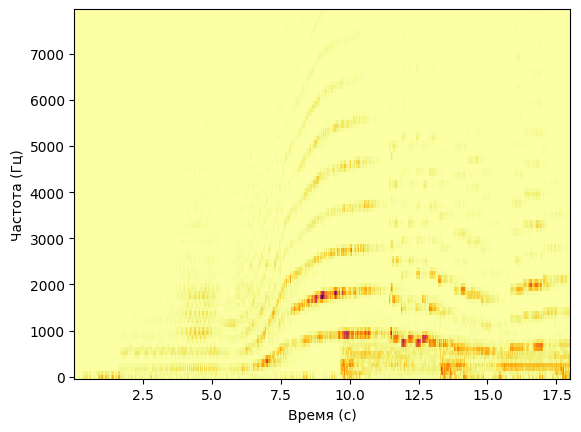

In [4]:
audio_wave = read_wave('3.1.wav')
wave_part = audio_wave.segment(start=2, duration=2.5)
wave_part.plot()
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

audio_wave.make_audio()
freq_content = wave_part.make_spectrum()
freq_content.plot()
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

audio_wave.make_spectrogram(512).plot(high=8000)
plt.xlabel('Время (с)')
plt.ylabel('Частота (Гц)')
plt.show()

class TromboneGliss(Chirp):
    def evaluate(self, ts):
        l1, l2 = 1.0 / self.start, 1.0 / self.end
        lengths = np.linspace(l1, l2, len(ts) - 1)
        freqs = 1 / lengths
        dts = np.diff(ts)
        dphis = PI2 * freqs * dts
        phases = np.cumsum(dphis)
        ys = self.amp * np.cos(phases)
        return ys

trombone_signal = TromboneGliss(262, 349)
first_wave = trombone_signal.make_wave(duration=1)
first_wave.apodize()
first_wave.make_audio()

Упражнение 3.5

Продолжается работа с классом `TromboneGliss` для симуляции глиссандо тромбона. Сначала генерируется восходящее глиссандо (например, от C3 до F3), визуализируется его начальный фрагмент и применяется аподизация. Затем аналогичным образом создается нисходящее глиссандо (от F3 до C3) с визуализацией его начального участка и аподизацией. Эти два сигнала объединяются для создания эффекта глиссандо "вверх-вниз". Для объединенного сигнала строится и отображается его спектр и спектрограмма, позволяющие увидеть, как мгновенная частота изменяется нелинейно во времени, отражая специфику изменения длины звуковой трубы тромбона.

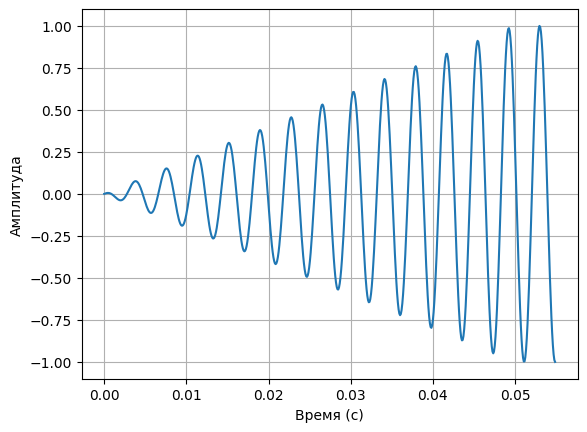

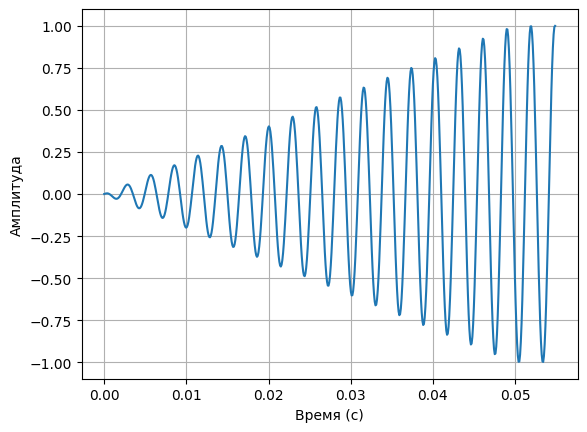

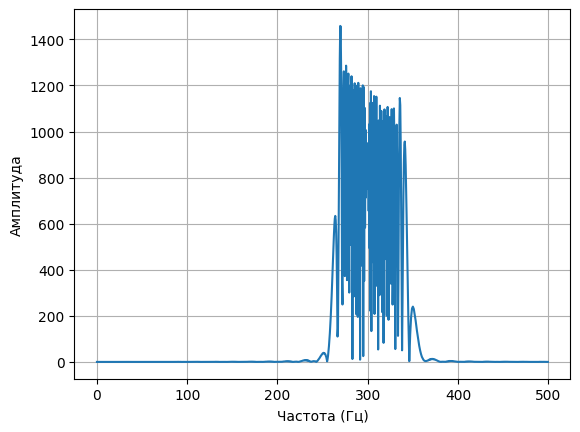

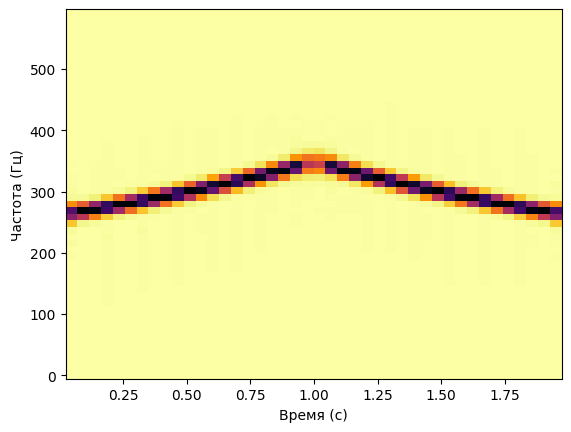

In [5]:
first_wave.segment(start=0, duration=0.055).plot()
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

trombone_signal = TromboneGliss(349, 262)
second_wave = trombone_signal.make_wave(duration=1)
second_wave.apodize()
second_wave.make_audio()

second_wave.segment(start=0, duration=0.0550).plot()
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

combined_wave = first_wave | second_wave
combined_wave.make_audio()

combined_wave.make_spectrum().plot(high=500)
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

combined_wave.make_spectrogram(1024).plot(high=600)
plt.xlabel('Время (с)')
plt.ylabel('Частота (Гц)')
plt.show()

Упражнение 3.6

В этом заключительном упражнении анализируются звуки гласных. Загружается аудиофайл `3.3.wav`, предположительно содержащий запись произнесения различных гласных звуков. Визуализируется сегмент этого аудиосигнала, чтобы рассмотреть общую структуру записи. Ключевым элементом анализа является построение спектрограммы всего сигнала. Ожидается, что спектрограмма покажет характерные формантные структуры для каждой гласной, позволяя визуально различить их по распределению энергии на разных частотах во времени.

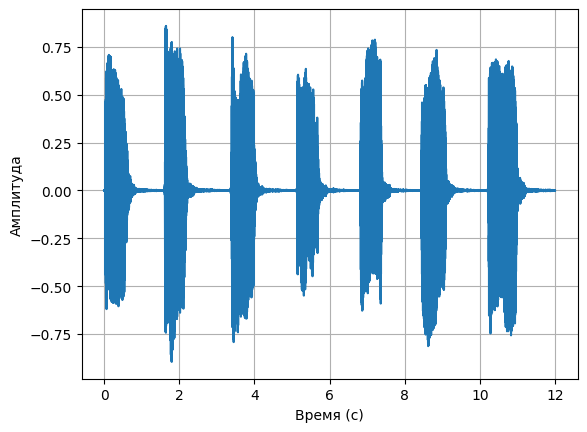

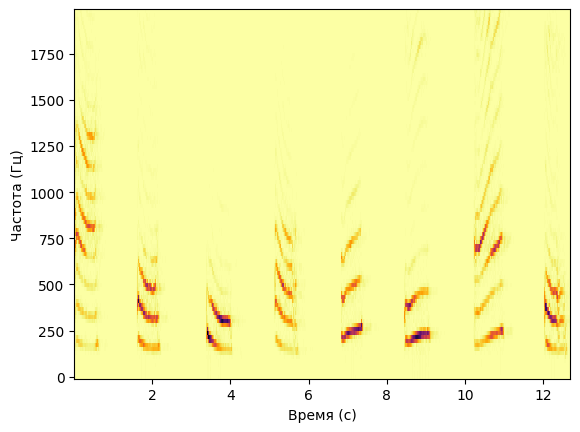

In [6]:

vowel_wave = read_wave('3.3.wav')
vowel_segment = vowel_wave.segment(start=0, duration=12)
vowel_segment.plot()
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

vowel_wave.make_audio()

vowel_wave.make_spectrogram(2048).plot(high=2000)
plt.xlabel('Время (с)')
plt.ylabel('Частота (Гц)')
plt.show()

Вывод (Лабораторная работа №3):

В ходе выполнения данной лабораторной работы были освоены методы анализа и синтеза апериодических сигналов, таких как чирпы и глиссандо. Произведено исследование их спектральных характеристик с помощью построения спектров и спектрограмм, что позволило наглядно продемонстрировать изменение частотных компонент во времени. Были разработаны пользовательские классы для генерации сигналов со сложной структурой, включая пилообразный чирп и модель глиссандо тромбона. Практически подтверждено, что апериодичность сигнала, то есть непостоянство его периода или частоты, приводит к усложнению его спектрального представления по сравнению с простыми гармоническими сигналами, и требует применения оконных функций для корректного анализа.